# Installing Yolov8 package

In [ ]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 7.5 MB/s eta 0:00:00


# Importing YOLO

In [ ]:
from ultralytics import YOLO

In [ ]:
# Create model object
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 211MB/s]


 yolov8m.pt file is downloaded from the Ultralytics server to the current folder.

# Trying pre-trained model on an image

![Cat_Dog image](https://www.freecodecamp.org/news/content/images/2023/04/cat_dog.jpg)

In [ ]:
result = model.predict('https://www.freecodecamp.org/news/content/images/2023/04/cat_dog.jpg')


100%|██████████| 29.5k/29.5k [00:00<00:00, 21.6MB/s]
image 1/1 /content/cat_dog.jpg: 448x640 1 cat, 1 dog, 100.1ms
Speed: 16.5ms preprocess, 100.1ms inference, 39.6ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
result = result[0]
print(result)

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [ ]:
print(len(result.boxes))

2


In [ ]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94
---
Object type: cat
Coordinates: [140, 170, 256, 315]
Probability: 0.91
---


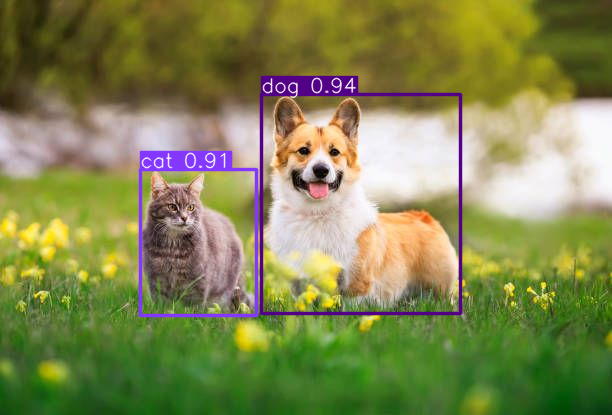

In [ ]:
from PIL import Image
Image.fromarray(result.plot()[:, :, ::-1])

# ------------------------------
# Another code for ploting the image

# import matplotlib.pyplot as plt
# plt.imshow(result.plot()[:, :, ::-1])
# plt.show()

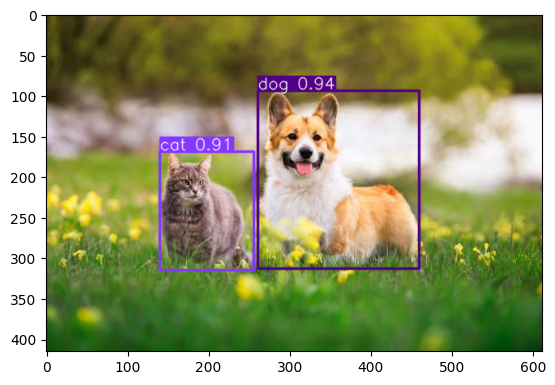

# Training YOLOv8 on Custom Data (Traffic Lights Data)

![Structure of Data](https://www.freecodecamp.org/news/content/images/2023/04/dataset_structure.png)

Structure of data

## Unzip Data

In [ ]:
! unzip ../content/road-signs.zip

Archive:  ../content/road-signs.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/perintah-pilihan-memasuki-salah-satu-jalur--64-_jpg.rf.ca52a211513d363023f41d44160b6c6a.jpg  
 extracting: test/images/perintah-pilihan-memasuki-salah-satu-jalur--66-_jpg.rf.d7da089766ebc56b25d725d23400241d.jpg  
 extracting: test/images/perintah-pilihan-memasuki-salah-satu-jalur--67-_jpg.rf.1f52990ceee7e516138ad06c843397dc.jpg  
 extracting: test/images/perintah-pilihan-memasuki-salah-satu-jalur--68-_jpg.rf.de641d7695fdd5741b174a0c424c3e68.jpg  
 extracting: test/images/perintah-pilihan-memasuki-salah-satu-jalur--69-_jpg.rf.92d2e734426473931270b421b2a3911d.jpg  
 extracting: test/images/perintah-pilihan-memasuki-salah-satu-jalur--7-_jpg.rf.bbd3499ab5466239f57f8dd68a0e71c9.jpg  
 extracting: test/images/perintah-pilihan-memasuki-salah-satu-jalur--70-_jpg.rf.abb61f54ae69

In [41]:
model.train(data='data.yaml', epochs=20)

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0771288220>
fitness: 0.8280409750493343
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.81275,     0.93255,      0.8429,     0.89465,     0.90892,     0.84379,     0.87906,     0.79717,     0.91794,     0.80785,     0.81275,     0.81275,     0.82384,     0.77469,     0.63625,      0.7728,     0.76677,     0.79136,     0.81275,     0.85804,     0.56813])
names: {0: 'bus_stop', 1: 'do_not_enter', 2: 'do_not_stop', 3: 'do_not_turn_l', 4: 'do_not_turn_r', 5: 'do_not_u_turn', 6: 'enter_left_lane', 7: 'green_light', 8: 'left_right_lane', 9: 'no_parking', 10: 'parking', 11: 'ped_crossing', 12: 'ped_zebra_cross', 13: 'railway_crossing', 14: 'red_light', 15: 's

In [50]:
metrics = model.val()

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/valid/labels.cache... 488 images, 0 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  2.00it/s]
                   all        488        529       0.95      0.913      0.965      0.811
          do_not_enter        488         30      0.993      0.967      0.993      0.926
           do_not_stop        488         30      0.879      0.933      0.909      0.842
         do_not_turn_l        488         34      0.984          1      0.995      0.897
         do_not_turn_r        488         31      0.905      0.935      0.969      0.909
         do_not_u_turn        488         30      0.895      0.851       0.95      0.839
       enter_left_lane        488         30      0.952          1      0.975      0.879
           green_light    

In [55]:
print(round(metrics.box.map, 2))
print("----")
print(round(metrics.box.map50, 2))
print("----")
print(round(metrics.box.map75, 2))

0.81
----
0.97
----
0.91
